In [58]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from PIL import Image
import matplotlib.pyplot as plt
import imageio

In [56]:
!pip install imageio

### Frozen Lake environment

In [44]:
env = gym.make('FrozenLake-v1',render_mode="rgb_array")

### Hyper-parameters

In [45]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
# print(action_space_size,state_space_size)
q_table = np.zeros((state_space_size, action_space_size)) # q-learning

num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

### Q-Learning training using Epsilon-greedy strategy

In [46]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()[0]
    terminated = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        exp_exp_tradeoff = random.uniform(0, 1) # epsilon-greedy
        if exp_exp_tradeoff > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        # print( env.step(action), state,action)
        new_state, reward, terminated, truncated, info = env.step(action)
        # print(new_state)
        
        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        rewards_current_episode += reward
        state = new_state
        if terminated == True: 
            break
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode) 
    rewards_all_episodes.append(rewards_current_episode)

### Plotting average rewards of every 100 episodes

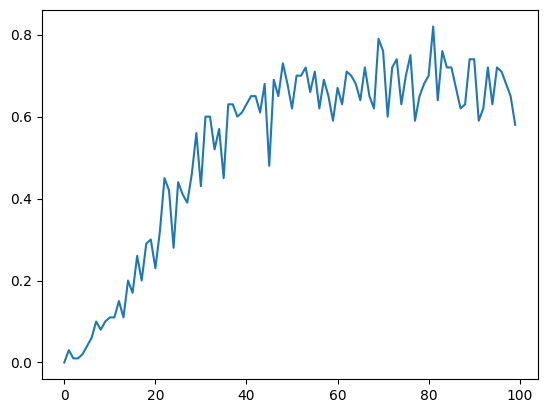

In [68]:
temp = np.split(np.array(rewards_all_episodes),100)
temp = [np.mean(i) for i in temp]
plt.plot(temp) # average rewards per 100 episodes
plt.show()

In [48]:
print(q_table)

[[0.4743944  0.4727432  0.47177106 0.47256396]
 [0.24385758 0.3420455  0.26434853 0.45114734]
 [0.3898758  0.38032431 0.40723607 0.44076535]
 [0.32698708 0.31425315 0.19557099 0.4322145 ]
 [0.48069422 0.34131311 0.31884741 0.30001737]
 [0.         0.         0.         0.        ]
 [0.1841373  0.13020282 0.30888988 0.08878824]
 [0.         0.         0.         0.        ]
 [0.36508988 0.43590724 0.35973797 0.50630471]
 [0.36245885 0.53883774 0.4405232  0.40634921]
 [0.54824651 0.37179491 0.31220101 0.37601513]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47753778 0.58700501 0.61950592 0.55708904]
 [0.75907208 0.79746169 0.76822363 0.75015722]
 [0.         0.         0.         0.        ]]


In [41]:
!pip install gym[toy_text]

     |████████████████████████████████| 18.3 MB 110.7 MB/s eta 0:00:01


### Rendering the environment using optimized Q-table

In [66]:
env.reset()
frames = []
num_steps = 0
for episode in range(1):
    state = env.reset()[0]
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps_per_episode):
        # plt.imshow(env.render())
        # print(state)
        frame = env.render()
        frames.append(frame)
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, truncated, info = env.step(action)
        
        if done:
            print("Number of steps", step)
            num_steps = step
            frames.append(env.render())
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
Number of steps 76


### Saving the frames as a gif

In [67]:
image_path = "episode.gif"
imageio.mimsave(image_path, frames, duration=0.2*num_steps)
print(f"GIF saved at {image_path}")

GIF saved at episode.gif
